In [1]:
import numpy as np
import math
import random
from gurobipy import*
from gurobipy import GRB
import matplotlib.pyplot as plt
import pandas as pd

## Función para generación aleatoria de hipergrafos

In [2]:
def rand_hgraf(n,m,d):
    E = np.random.randint(2,d+1,size=(m))
    M = np.arange(m)
    N = np.arange(n)
    A = np.zeros((n,m))
    for j in M:
        t = 0
        while t < E[j]:
            s = int(np.random.choice(N,size=1))
            A[s,j] = 1
            t = np.sum(A[:,j])
    return A

In [4]:
#Tamaño promedio de las hiperaristas
def prom(A):
    m = A.shape[1]
    P = []
    for y in range(m):
        P.append(sum(A[:,y]))
    p = np.average(P)
    return p

#Tamaño máximo de las hiperaristas
def tamax(A):
    S = np.sum(A,axis=0)
    m = int(np.max(S))
    return m

#Vértices cubiertos por hiperaristas
def vert_cover(A,h):
    n = A.shape[0]
    S= np.zeros(n)
    for j in h:
        S += A[:,j]
    vc = np.where(S!=0)[0]
    return len(vc)

#Intersección entre hiperaristas
def inter(A,e1,e2):
    s = A[:,e1]+A[:,e2]
    i = np.where(s>1)[0]
    return i

In [15]:
n = 30
m = 100
d = 5
K = 3
nk = int(n/K)
A = rand_hgraf(n,m,d)

In [16]:
Int = {y:{x:inter(A,y,x)[0] for x in range(m) if x!=y and len(inter(A,y,x))==1} for y in range(m)}
Int

{0: {1: 8,
  7: 29,
  8: 23,
  9: 29,
  10: 23,
  18: 29,
  19: 8,
  20: 23,
  25: 5,
  27: 23,
  28: 5,
  30: 23,
  35: 23,
  37: 8,
  38: 8,
  41: 23,
  45: 29,
  48: 23,
  51: 29,
  54: 8,
  55: 29,
  59: 29,
  61: 5,
  67: 23,
  68: 5,
  75: 5,
  76: 29,
  82: 23,
  85: 23,
  87: 29,
  89: 23,
  90: 29,
  91: 8,
  95: 8,
  98: 23,
  99: 8},
 1: {0: 8,
  2: 14,
  5: 1,
  6: 21,
  8: 21,
  12: 1,
  15: 14,
  17: 1,
  19: 8,
  22: 14,
  23: 14,
  30: 14,
  33: 21,
  34: 8,
  35: 14,
  37: 8,
  38: 8,
  42: 14,
  45: 1,
  46: 21,
  49: 14,
  51: 14,
  53: 21,
  54: 8,
  57: 1,
  63: 1,
  65: 8,
  67: 21,
  69: 1,
  71: 1,
  75: 21,
  78: 8,
  79: 1,
  83: 21,
  85: 14,
  91: 8,
  95: 8,
  99: 8},
 2: {1: 14,
  3: 25,
  4: 28,
  13: 28,
  14: 28,
  15: 14,
  18: 10,
  21: 25,
  22: 14,
  23: 14,
  24: 25,
  29: 10,
  30: 14,
  35: 14,
  36: 28,
  39: 25,
  40: 10,
  49: 14,
  50: 10,
  51: 14,
  52: 10,
  59: 10,
  63: 28,
  66: 10,
  70: 28,
  72: 25,
  80: 25,
  81: 25,
  83: 10,
  84

In [26]:
CM = []
M = [y for y in range(m)]
x = M.pop(0)
L = []
while vert_cover(A,L)<=nk:
    h_act = x
    print('h_act={}'.format(h_act))
    L.append(h_act)
    print('L={}'.format(L))
    for x in Int[h_act]:
        print('x={}'.format(x))
        if x not in L:
            print('nuevo')
            h_act=x
            break
print(L)

h_act=0
L=[0]
x=1
nuevo
h_act=1
L=[0, 1]
x=0
x=2
nuevo
h_act=2
L=[0, 1, 2]
x=1
x=3
nuevo
h_act=3
L=[0, 1, 2, 3]
x=2
x=5
nuevo
[0, 1, 2, 3]


In [28]:
vert_cover(A,[0,1,2,3])

11

In [29]:
def find_vertex_covers(A,nk):
    def find_vertex_covers_recursive(remaining_vertices, L):
        if vert_cover(A, L) <= nk:
            # If the current vertex cover 'L' is valid, add it to the list of covers
            covers.append(L[:])
        
        for vertex in remaining_vertices:
            # Check if including the current vertex 'vertex' violates any inter(A, y, x) constraints
            if all(vertex not in Int[y] for y in L):
                # Include the current vertex in the vertex cover
                L.append(vertex)
                
                # Recur with the remaining vertices to explore other combinations
                find_vertex_covers_recursive(remaining_vertices[1:], L)
                
                # Backtrack and remove the current vertex from the vertex cover
                L.pop()

    # Initialize variables and lists
    m = len(A[0])  # Number of hyperedges
    all_vertices = list(range(m))  # List of all vertices
    covers = []  # List to store all valid vertex covers
    
    # Start the recursive function with an empty vertex cover 'L'
    find_vertex_covers_recursive(all_vertices, [])
    
    return covers

In [30]:
find_vertex_covers(A,nk)

KeyboardInterrupt: 

In [4]:
#Hiperaristas tipo hoja
def hoja(A):
    n = A.shape[0]
    S = np.sum(A,axis=1)
    h = []
    for i in range(n):
        if S[i]==1:
            j = np.where(A[i,:]==1)[0][0]
            h.append(j)
    return h
#Conjuntos minimales de 3 elementos
def minimal3(A,nk):
    m = A.shape[1]
    M = [x for x in range(m)]
    S = []
    for x in M:
        s = []
        i = M.index(x)
        for y in M[i+1:]:
            i = M.index(y)
            for z in M[i+1:]:
                if vert_cover(A,[x,y])<=nk and vert_cover(A,[x,z])<=nk and vert_cover(A,[y,z])<=nk and vert_cover(A,[x,y,z])>nk:
                    S.append([x,y,z])
                else:
                    break
    return S

#Número de hiperaristas mínimo
def ALFA(A,nk):
    T=list(set(np.sum(A,axis=0).astype(int)))
    T.sort(reverse=True)
    t = 100
    i = 0
    r = []
    C = {}
    while t>2:
        t = T[i]
        d,e = math.modf((nk-1-sum(r))/(t-1))
        C.update({t:e})
        if e!=0 and nk!=t:
            r.append(e*(t-1))
            i += 1
        else:
            i += 1
    C_f = {x:C[x] for x in C.keys() if C[x]>0}
    s = sum([C_f[x] for x in C_f.keys()])
    return C_f,s

In [5]:
def find_cycles(graph):
    def dfs(node,parent,visited,current_cycle):
        visited[node] = True
        current_cycle.append(node)
        for neighbor in graph[node]:
            if neighbor != parent:
                if visited[neighbor]:
                    if neighbor in current_cycle:
                        cycles.append(current_cycle[current_cycle.index(neighbor):])
                else:
                    dfs(neighbor, node, visited, list(current_cycle))
    visited = {node: False for node in graph}
    cycles = []
    for node in graph:
        if not visited[node]:
            dfs(node, None, visited, [])
    return cycles

In [6]:
def ciclos(A,P):
    n_int = set([inter(A,x,y)[0] for x in P for y in P if len(inter(A,x,y))>0 and x!=y])
    adjv = {i: [] for i in n_int}
    for x in P:
        for y in P:
            if x!=y:
                if len(inter(A,x,y))>0:
                    adjv[inter(A,x,y)[0]].append('e{}'.format(x))
    for x in adjv:
        adjv[x]=set(adjv[x])
    part = ['e{}'.format(x) for x in P]
    adjh = {x:[y for y in adjv.keys() if x in adjv[y]] for x in part}
    graph = {}
    graph.update(adjh)
    graph.update(adjv)
    cy = find_cycles(graph)
    return [[x for x in cy[y] if type(x)==str] for y in range(len(cy))]

## Formulación $\mathcal{F}2$

In [7]:
def F2(A,W,K):
    #Parámetros
    #A: matriz de incidencia del hipergrafo
    #W: vector de pesos de las hiperaristas
    #K: número de particionamiento
    n = A.shape[0]   #Número de nodos
    m = A.shape[1]   #Número de hiperaristas
    nk = int(n/K)     #Tamaño de cada partición
    #Listas de conjuntos para las variables
    N = np.arange(n)
    M = np.arange(m)
    C = np.arange(K)
    #Creación del modelo
    modelo=Model()
    modelo.Params.LogToConsole = 0
    modelo.Params.timeLimit = 1800
    modelo.Params.cuts = 0
    #creación de variables
    x = modelo.addVars(N,C,vtype=GRB.BINARY, name='x')
    y = modelo.addVars(M,C,vtype=GRB.BINARY, name='y')
    #Función objetivo
    obj = quicksum(W[j]*y[j,k] for j in M for k in C)
    modelo.setObjective(obj, GRB.MINIMIZE)
    #Restricciones
    #(3.2)
    modelo.addConstrs(quicksum(x[i,k] for k in C) == 1 for i in N)
    #(3.3)
    modelo.addConstrs(quicksum(x[i,k] for i in N) == nk for k in C)
    #(3.4)
    modelo.addConstrs(x[i,k] <= quicksum(A[i,j]*y[j,k] for j in M) for k in C for i in N)
    #(3.5)
    modelo.addConstrs(quicksum(y[j,k] for k in C) <= 1 for j in M)
    #(3.6)
    modelo.addConstrs(quicksum(A[i,j]*x[i,k] for i in N) >= sum(A[:,j])*y[j,k] for j in M for k in C)
    #(3.)
    modelo.addConstrs(quicksum((sum(A[:,j])-1)*y[j,k] for j in M) == nk-1 for k in C)
    for i in range(m):
        for j in range(i+1,m):
            if len(inter(A,i,j))>1:
                modelo.addConstr(quicksum(y[i,k]+y[j,k] for k in C)<= 1)
    modelo.update()
    #Lazy constraints
    count_lazy = 0
    def cicloelim(modelo,where):
        global count_lazy
        E_laz = [[] for _ in C]
        if where == GRB.Callback.MIPSOL:
            y_vals = modelo.cbGetSolution(y)
            for k in C:
                for j in M:
                    if y_vals[j,k]>0.5:
                        E_laz[k].append(j)
                CY = ciclos(A,E_laz[k])
                if len(CY)>0:
                    for p in range(len(CY)):
                        S = [int(x[1:]) for x in CY[p]]
                        for l in C:
                            modelo.cbLazy(quicksum(y[j,l] for j in S) <= len(S)-1)
                            count_lazy += 1
    modelo.Params.lazyConstraints = 1
    modelo.optimize(cicloelim)
    #Recuperación de variables
    V = []
    E = []   
    if modelo.SolCount == 0:
        time_r = modelo.Runtime
        sol = None
        nods = None
        g = None
        return V,E,time_r,sol,nods,g
    else:        
        time_r = modelo.Runtime
        sol = modelo.ObjVal
        nods = modelo.NodeCount
        g = 100*modelo.MIPGap
        for k in C:
            X = []
            for i in N:
                if x[i,k].x != 0:
                    X.append(i)
            V.append(X)
            Y = []
            for j in M:
                if y[j,k].x != 0:
                    Y.append(j)
            E.append(Y)
    return V,E,time_r,sol,[nods,count_lazy],g

## Formulación $\mathcal{F}2$ PC

In [ ]:
#Tipo hoja
def F2_pc1(A,W,K):
    #Parámetros
    #A: matriz de incidencia del hipergrafo
    #W: vector de pesos de las hiperaristas
    #K: número de particionamiento
    n = A.shape[0]   #Número de nodos
    m = A.shape[1]   #Número de hiperaristas
    nk = int(n/K)     #Tamaño de cada partición
    #Listas de conjuntos para las variables
    N = np.arange(n)
    M = np.arange(m)
    C = np.arange(K)
    #Creación del modelo
    modelo=Model()
    modelo.Params.LogToConsole = 0
    modelo.Params.timeLimit = 1800
    modelo.Params.cuts = 0
    modelo._cbCuts = 0
    #creación de variables
    x = modelo.addVars(N,C,vtype=GRB.BINARY, name='x')
    y = modelo.addVars(M,C,vtype=GRB.BINARY, name='y')
    #Función objetivo
    obj = quicksum(W[j]*y[j,k] for j in M for k in C)
    modelo.setObjective(obj, GRB.MINIMIZE)
    #Restricciones
    modelo.addConstrs(quicksum(x[i,k] for k in C) == 1 for i in N) #(2)
    
    modelo.addConstrs(quicksum(x[i,k] for i in N) == nk for k in C) #(3)
    modelo.addConstrs(x[i,k] <= quicksum(A[i,j]*y[j,k] for j in M) for k in C for i in N) #(4)
    modelo.addConstrs(quicksum(y[j,k] for k in C) <= 1 for j in M) #(5)
    modelo.addConstrs(quicksum(A[i,j]*x[i,k] for i in N) >= sum(A[:,j])*y[j,k] for j in M for k in C) #(6)
    modelo.addConstrs(quicksum((sum(A[:,j])-1)*y[j,k] for j in M) == nk-1 for k in C) #(10)
    for i in range(m):
        for j in range(i+1,m):
            if len(inter(A,i,j))>1:
                modelo.addConstr(quicksum(y[i,k]+y[j,k] for k in C)<= 1) #(9)
    #Hiperaristas tipo hoja
    for h in hoja(A):
        modelo.addConstr(quicksum(y[h,k] for k in C) == 1)
        modelo._cbCuts+=1
    modelo.update()
    #Lazy constraints (11)
    count_lazy = 0
    def cicloelim(modelo,where):
        global count_lazy
        E_laz = [[] for _ in C]
        if where == GRB.Callback.MIPSOL:
            y_vals = modelo.cbGetSolution(y)
            for k in C:
                for j in M:
                    if y_vals[j,k]>0.5:
                        E_laz[k].append(j)
                CY = ciclos(A,E_laz[k])
                if len(CY)>0:
                    for p in range(len(CY)):
                        S = [int(x[1:]) for x in CY[p]]
                        for l in C:
                            modelo.cbLazy(quicksum(y[j,l] for j in S) <= len(S)-1)
                            count_lazy += 1
    modelo.Params.lazyConstraints = 1
    modelo.optimize(cicloelim)
    #Recuperación de variables
    V = []
    E = []   
    if modelo.SolCount == 0:
        time_r = modelo.Runtime
        sol = None
        nods = None
        g = None
        return V,E,time_r,sol,nods,g
    else:        
        time_r = modelo.Runtime
        sol = modelo.ObjVal
        nods = modelo.NodeCount
        g = 100*modelo.MIPGap
        for k in C:
            X = []
            for i in N:
                if x[i,k].x != 0:
                    X.append(i)
            V.append(X)
            Y = []
            for j in M:
                if y[j,k].x != 0:
                    Y.append(j)
            E.append(Y)
    return V,E,time_r,sol,[nods,count_lazy],g

## Formulación $\mathcal{F}3$

In [8]:
def F3(A,W,K):
    #Parámetros
    #A: matriz de incidencia del hipergrafo
    #W: vector de pesos de las hiperaristas
    #K: número de particionamiento
    n = A.shape[0]   #Número de nodos
    m = A.shape[1]   #Número de hiperaristas
    nk = int(n/K)     #Tamaño de cada partición
    #Listas de conjuntos para las variables
    N = np.arange(n)
    M = np.arange(m)
    C = np.arange(K)
    Nv = ['v{}'.format(i) for i in range(n)]
    Me = ['e{}'.format(i) for i in range(m)]
    w = Nv+Me+['S']
    arcs={(i,j): 1 for i in Nv for j in Me if A[Nv.index(i),Me.index(j)]==1}
    arcx={(i,j): 1 for i in Nv for j in Me if A[Nv.index(i),Me.index(j)]==1}
    arci={(j,i): 1 for i in Nv for j in Me if A[Nv.index(i),Me.index(j)]==1}
    A2 = {**arcs,**arci}
    A1={('S',i): nk for i in Nv}
    arcs.update(arci)
    arcs.update(A1)
    d={}
    for x in w:
        if x in Nv:
            d.update({x:1})
        elif x in Me:
            d.update({x:0})
        else:
            d.update({x:-n})
    arcos, cap = multidict(arcs)
    #Creación del modelo    
    modelo=Model()
    modelo.Params.LogToConsole = 0
    modelo.Params.timeLimit = 1800.0
    modelo.Params.cuts = 0
    #creación de variables
    f = modelo.addVars(arcos,vtype=GRB.INTEGER,name='f',lb=0)
    z = modelo.addVars(arcos,vtype=GRB.BINARY, name='z')
    h = modelo.addVars(M,vtype=GRB.BINARY, name='h')
    #Función objetivo
    obj = quicksum(W[j]*h[j] for j in M)
    modelo.setObjective(obj, GRB.MINIMIZE)
    #Restricciones
    modelo.addConstr(quicksum(z['S',i] for i in Nv) == K) #(13)
    modelo.addConstrs(f['S',i] == nk*z['S',i] for i in Nv) #(14)
    modelo.addConstrs(z[i,j]<= f[i,j] for (i,j) in A2) #(15)
    modelo.addConstrs(f[i,j] <= (nk-1)*z[i,j] for (i,j) in A2) #(16)
    modelo.addConstrs(f.sum('*',i)-f.sum(i,'*') == d[i] for i in w) #(17)
    modelo.addConstrs(z.sum('*',i) == 1 for i in Nv) #(18)
    modelo.addConstrs(z.sum('*',j) == h[Me.index(j)] for j in Me) #(19)
    modelo.addConstrs(z.sum(j,'*') == (sum(A[:,Me.index(j)])-1)*h[Me.index(j)] for j in Me) #(20)
    modelo.addConstrs(z[i,j]+z[j,i]<= 1 for (i,j) in arcx)
    modelo.update()
    modelo.optimize()
    #Recuperación de variables
    F = []
    Z = []
    Y = []
    H = []   
    if modelo.SolCount == 0:
        time_r = modelo.Runtime
        sol = None
        nods = None
        g = None
        return F,Z,Y,[],H,time_r,sol,nods,g
    else:        
        time_r = modelo.Runtime
        sol = modelo.ObjVal
        nods = modelo.NodeCount
        g = 100*modelo.MIPGap
        for i in arcos:
            if f[i].x > 0:
                F.append([i,f[i].x])    
        for j in arcos:
            if z[j].x > 0:
                Z.append([j,z[j].x])
                if j[0]=='S':
                    Y.append(j[1])
        #for k in Me:
        #    if h[Me.index(k)].x == 1:
        #        H.append(k)        
        k=len(Y)
        pz=[]
        f=dict(F)
        Fv=[x for x in f if x[0] in Nv]
        Fe=[x for x in f if x[0] in Me]
        for y in Y:
            pz.extend([('S',y)])
            T=[y]
            p=[0]
            pt=[0]
            while len(pt)>0:
                t=[]
                pt = []
                for i in T:
                    if i in Nv:
                        p=[x for x in Fv if x[0]==i]
                        s=[x[1] for x in Fv if x[0]==i]
                        for y in p:
                            Fv.remove(y)
                        pt.extend(p)
                    else:
                        p=[x for x in Fe if x[0]==i]
                        s=[x[1] for x in Fe if x[0]==i]
                        for y in p:
                            Fe.remove(y)
                        pt.extend(p)
                    t.extend(s)
                    pz.extend(pt)
                T=t
        P=[]
        i=0
        J=[]
        for x in pz:
            if x[0]=='S':
                J.append(i)
            i+=1
        J.append(len(pz))
        for j in range(len(J)-1):
            P.append([pz[x] for x in np.arange(J[j],J[j+1])])
        V=[]
        H=[]
        for x in range(len(P)):
            v=[]
            h=[]
            for y in P[x]:
                if y[0] in Nv and y[1]!='S':
                    v.append(y[0])
                    h.append(y[1])
                elif y[1] in Nv and y[0]!='S':
                    v.append(y[1])
                    h.append(y[0])
            v=list(set(v))
            V.append(v)
            h=list(set(h))
            H.append(h)
        for c in C:
            V[c]=[int(x[1:]) for x in V[c]]
            H[c]=[int(x[1:]) for x in H[c]]
    return F,Z,Y,V,H,time_r,sol,nods,g

## Formulación $\mathcal{F}3$ PC

In [ ]:
#Tipo Hoja

In [ ]:
#Eliminación de simetrías

In [ ]:
#Hiperaristas contenidas

In [ ]:
#Tipo knapsack

In [9]:
n = 45
m = 500
d = 2
K = 3
nk = int(n/K)
A = rand_hgraf(n,m,d)
W = np.random.randint(1,21,size=m)

In [10]:
V,E,tr,sol,nods,g = F4(A,W,K)
F,Z,Y,V5,H,time_r5,sol5,nods5,g5 = F5(A,W,K)

Set parameter Username

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2023-08-03


In [11]:
sol,sol5

(69.0, 69.0)

In [12]:
tr,time_r5

(4.5614776611328125, 6.520612716674805)

In [13]:
g,g5

(0.0, 0.0)

In [14]:
nods,nods5

(5013.0, 12043.0)

In [15]:
E,H

([[84, 101, 158, 174, 204, 212, 266, 284, 299, 353, 354, 360, 476, 480],
  [1, 36, 40, 93, 135, 146, 152, 286, 330, 406, 426, 436, 445, 467],
  [19, 22, 58, 62, 85, 98, 139, 162, 163, 190, 215, 268, 363, 404]],
 [[152, 19, 426, 435, 445, 365, 406, 436, 135, 36, 270, 286, 1, 330],
  [84, 158, 360, 353, 354, 476, 101, 325, 299, 284, 480, 212, 204, 266],
  [146, 163, 215, 162, 22, 62, 40, 98, 404, 171, 58, 190, 268, 139]])

In [16]:
cycles(A,H[2])

[]

In [17]:
for x in E:
    for y in H:
        if set(x)==set(y):
            print(x,y)

In [18]:
E[2],H[2]

([19, 22, 58, 62, 85, 98, 139, 162, 163, 190, 215, 268, 363, 404],
 [146, 163, 215, 162, 22, 62, 40, 98, 404, 171, 58, 190, 268, 139])

In [19]:
F[-2:]

[[('S', 'v24'), 15.0], [('S', 'v37'), 15.0]]

In [20]:
V5,V

([[3, 2, 4, 12, 36, 0, 43, 38, 10, 17, 5, 44, 29, 22, 34],
  [30, 16, 7, 39, 28, 32, 19, 24, 25, 9, 42, 15, 21, 1, 11],
  [6, 14, 18, 33, 40, 27, 20, 41, 26, 13, 37, 35, 8, 23, 31]],
 [[1, 7, 9, 11, 15, 16, 19, 21, 24, 25, 28, 30, 32, 39, 42],
  [0, 2, 5, 8, 10, 12, 13, 17, 18, 22, 29, 34, 36, 43, 44],
  [3, 4, 6, 14, 20, 23, 26, 27, 31, 33, 35, 37, 38, 40, 41]])

In [21]:
vert_cover(A,E[2])

15

In [22]:
sum(W[E[2]]),sum(W[H[2]])

(28, 28)

In [23]:
E[0],E[1]

([84, 101, 158, 174, 204, 212, 266, 284, 299, 353, 354, 360, 476, 480],
 [1, 36, 40, 93, 135, 146, 152, 286, 330, 406, 426, 436, 445, 467])

In [24]:
dicv = {y: [i for i in range(n) if A[i,y]==1] for y in range(m)}
dich = {y: [j for j in range(m) if len(inter(A,y,j))>0 and y!=j] for y in range(m)}

In [25]:
cycles(A,E[0])

[]

In [26]:
cycles(A,E[1])

[]

In [27]:
E[0]

[84, 101, 158, 174, 204, 212, 266, 284, 299, 353, 354, 360, 476, 480]

In [28]:
dicv

{0: [14, 19],
 1: [17, 34],
 2: [18, 21],
 3: [5, 20],
 4: [21, 30],
 5: [7, 17],
 6: [24, 43],
 7: [19, 33],
 8: [0, 29],
 9: [1, 29],
 10: [6, 44],
 11: [27, 36],
 12: [0, 34],
 13: [3, 6],
 14: [31, 44],
 15: [19, 36],
 16: [14, 30],
 17: [39, 41],
 18: [13, 37],
 19: [3, 4],
 20: [17, 31],
 21: [8, 37],
 22: [23, 40],
 23: [0, 43],
 24: [4, 35],
 25: [6, 12],
 26: [25, 39],
 27: [16, 20],
 28: [13, 24],
 29: [5, 35],
 30: [2, 31],
 31: [5, 12],
 32: [12, 24],
 33: [4, 36],
 34: [20, 28],
 35: [7, 28],
 36: [0, 43],
 37: [7, 40],
 38: [26, 35],
 39: [6, 26],
 40: [8, 13],
 41: [5, 17],
 42: [11, 39],
 43: [14, 18],
 44: [12, 29],
 45: [1, 42],
 46: [2, 7],
 47: [2, 38],
 48: [1, 40],
 49: [1, 2],
 50: [0, 34],
 51: [23, 33],
 52: [18, 19],
 53: [6, 34],
 54: [24, 33],
 55: [6, 12],
 56: [2, 5],
 57: [9, 36],
 58: [26, 40],
 59: [20, 25],
 60: [4, 26],
 61: [34, 40],
 62: [35, 37],
 63: [38, 40],
 64: [28, 32],
 65: [21, 28],
 66: [16, 25],
 67: [11, 18],
 68: [15, 32],
 69: [0, 15],

In [29]:
dich

{0: [7,
  15,
  16,
  43,
  52,
  77,
  81,
  84,
  87,
  116,
  133,
  147,
  157,
  176,
  201,
  206,
  209,
  214,
  227,
  230,
  240,
  243,
  250,
  253,
  268,
  277,
  282,
  294,
  301,
  314,
  320,
  328,
  343,
  354,
  387,
  389,
  397,
  410,
  415,
  418,
  425,
  432,
  441,
  461,
  483],
 1: [5,
  12,
  20,
  41,
  50,
  53,
  61,
  87,
  96,
  122,
  129,
  144,
  170,
  182,
  188,
  205,
  210,
  216,
  232,
  275,
  283,
  289,
  312,
  322,
  327,
  329,
  335,
  337,
  339,
  343,
  385,
  392,
  394,
  401,
  403,
  414,
  433,
  435,
  436,
  440,
  442,
  452,
  478,
  487,
  497],
 2: [4,
  43,
  52,
  65,
  67,
  70,
  71,
  72,
  84,
  131,
  132,
  134,
  146,
  172,
  173,
  179,
  214,
  226,
  230,
  242,
  254,
  257,
  262,
  292,
  306,
  308,
  317,
  325,
  350,
  358,
  368,
  374,
  382,
  399,
  447,
  454],
 3: [27,
  29,
  31,
  34,
  41,
  56,
  59,
  85,
  89,
  93,
  104,
  119,
  140,
  154,
  161,
  165,
  168,
  189,
  197,
  207,
  2

In [30]:
import networkx as nx
from networkx.algorithms import bipartite

def graf(A,F,Y):
    n = A.shape[0]
    m = A.shape[1]
    k=len(Y)
    pz=[]
    f=dict(F)
    Nv = ['v{}'.format(i) for i in range(n)]
    Me = ['e{}'.format(i) for i in range(m)]
    Fv=[x for x in f if x[0] in Nv]
    Fe=[x for x in f if x[0] in Me]
    for y in Y:
        pz.extend([('S',y)])
        T=[y]
        p=[0]
        pt=[0]
        while len(pt)>0:
            #print('Fv={}'.format(Fv))
            #print('Fe={}'.format(Fe))
            t=[]
            #print('T={}'.format(T))
            pt = []
            for i in T:
                if i in Nv:
                    p=[x for x in Fv if x[0]==i]
                    s=[x[1] for x in Fv if x[0]==i]
                    #print('pv={}'.format(p))
                    #print('s={}'.format(s))
                    for y in p:
                        Fv.remove(y)
                    pt.extend(p)
                else:
                    p=[x for x in Fe if x[0]==i]
                    s=[x[1] for x in Fe if x[0]==i]
                    #print('pe={}'.format(p))
                    #print('s={}'.format(s))
                    for y in p:
                        Fe.remove(y)
                    pt.extend(p)
                t.extend(s)
                pz.extend(pt)
            T=t
    P=[]
    i=0
    J=[]
    for x in pz:
        if x[0]=='S':
            J.append(i)
        i+=1
    J.append(len(pz))
    for j in range(len(J)-1):
        P.append([pz[x] for x in np.arange(J[j],J[j+1])])
    for c in range(k):
        G = nx.OrderedDiGraph()
        G.add_nodes_from(Nv, bipartite=0)
        G.add_nodes_from(Me, bipartite=1)
        G.add_edges_from(P[c][1:])
        if m>10:
            plt.figure(c+1,figsize=(0.5*m,5))
        else:
            plt.figure(c+1)
        pos=dict()
        pos.update({i:[(1/n)*Nv.index(i),1.5] for i in Nv})
        pos.update({i:[(1/m)*Me.index(i),0] for i in Me})
        nx.draw_networkx(G,pos ,
                            node_size=350,
                            width = 2,
                            edge_color="tab:red",
                            connectionstyle='arc3, rad = 0.05')
        plt.tight_layout()
    V=[]
    H=[]
    for x in range(len(P)):
        v=[]
        h=[]
        for y in P[x]:
            if y[0] in Nv and y[1]!='S':
                v.append(y[0])
                h.append(y[1])
            elif y[1] in Nv and y[0]!='S':
                v.append(y[1])
                h.append(y[0])       
        v=list(set(v))
        V.append(v)
        h=list(set(h))
        H.append(h)
    return P,V,H

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


graf(A,F,['v11','v13'])

## Pruebas

In [31]:
P = np.array([[45,100],
              [45,200],
              [45,500],
              [90,150],
              [90,500],
              [90,1000],
              [150,300],
              [150,800],
              [150,1500],
              [180,400],
              [180,1000],
              [180,2000]])

tam = {45:[2,5,10],
       90:[2,5,10,20],
       150:[2,5,10,20],
       180:[2,5,10,20]}
R = []
Inst =[]
for p in P:
    for t in tam[p[0]]:
        n = p[0]
        m = p[1]
        K = 3
        sol =None
        tr=0
        i=0
        while sol==None and tr<1:
            A = rand_hgraf(n,m,t)
            pr = prom(A)
            W = np.random.randint(1,21,size=m)
            print(p,t)
            V,E,tr,sol,nod,g = F4(A,W,K)
            F,Z,Yf,Vf,Hf,trf,solf,nodf,gf = F5(A,W,K)
            i += 1
            if i >=10:
                break        
        #Tr=[tr,tr1,tr2,tr3,tr4,tr23,tr24,tr34]
        #S=[sol,sol1,sol2,sol3,sol4,sol23,sol24,sol34]
        #Nd=[nod,nod1,nod2,nod3,nod4,nod23,nod24,nod34]
        #G=[g,g1,g2,g3,g4,g23,g24,g34]
        Tr=[tr,trf]
        S=[sol,solf]
        Nd=[nod,nodf]
        G=[g,gf]
        print(Tr,S)
        print(Nd)
        R.append([p,pr,t,Tr,S,Nd,G])
        Inst.append([A,W])
    

[ 45 100] 2
[1.2396869659423828, 0.2594623565673828] [236.0, 236.0]
[1967.0, 803.0]
[ 45 100] 5
[3.9661922454833984, 12.660602569580078] [116.0, 116.0]
[4296.0, 3757.0]
[ 45 100] 10
[ 45 100] 10
[ 45 100] 10
[ 45 100] 10
[10.808387756347656, 55.20525550842285] [246.0, 246.0]
[5758.0, 7065.0]
[ 45 200] 2
[2.0608386993408203, 0.4536724090576172] [112.0, 112.0]
[2283.0, 495.0]
[ 45 200] 5
[9.50196647644043, 17.54499053955078] [57.0, 57.0]
[9417.0, 3310.0]
[ 45 200] 10
[68.84255599975586, 330.173131942749] [71.0, 71.0]
[34902.0, 16636.0]
[ 45 500] 2
[11.109865188598633, 13.896045684814453] [71.0, 71.0]
[37883.0, 88045.0]
[ 45 500] 5
[43.36014366149902, 107.61532974243164] [36.999999999999986, 37.0]
[44540.0, 8535.0]
[ 45 500] 10
[1800.0441150665283, 1800.0336360931396] [34.0, 34.0]
[183398.0, 4745.0]
[ 90 150] 2
[ 90 150] 2
[ 90 150] 2
[4.490653991699219, 1.400320053100586] [565.0, 565.0]
[5663.0, 4116.0]
[ 90 150] 5
[139.301118850708, 75.59670066833496] [230.0, 230.0]
[152040.0, 31645.0]


In [37]:
Df = pd.DataFrame(columns=['Instancia','Prom','Tam. max','Plano cortante','Valor Función Objetivo','GAP', 'Nodos','Tiempo [s]'],
                 index=np.arange(len(R)*2))

#pc = ['Ninguno','Tipo hoja','Elim. simetrías','Hiperaristas contenidas','Tipo knapsack','ES+CO','ES+KS','CO+KS']
pc = ['F2','F3']

for x in range(len(R)):
    for y in range(2):
        Df.at[2*x+y,'Instancia']=R[x][0]
        Df.at[2*x+y,'Prom']=R[x][1]
        Df.at[2*x+y,'Tam. max']=R[x][2]
        Df.at[2*x+y,'Plano cortante']=pc[y]
        Df.at[2*x+y,'Valor Función Objetivo']=R[x][4][y]
        Df.at[2*x+y,'GAP']=R[x][6][y]
        Df.at[2*x+y,'Nodos']=R[x][5][y]
        Df.at[2*x+y,'Tiempo [s]']=R[x][3][y]
Df

,Instancia,Prom,Tam. max,Plano cortante,Valor Función Objetivo,GAP,Nodos,Tiempo [s]
0,"[45, 100]",2,2,F2,236,0,1967,1.23969
1,"[45, 100]",2,2,F3,236,0,803,0.259462
2,"[45, 100]",3.49,5,F2,116,0,4296,3.96619
3,"[45, 100]",3.49,5,F3,116,0,3757,12.6606
4,"[45, 100]",5.57,10,F2,246,0,5758,10.8084
...,...,...,...,...,...,...,...,...
85,"[180, 2000]",3.506,5,F3,103,11.6505,559,1800.1
86,"[180, 2000]",6.145,10,F2,None,None,None,1800.13
87,"[180, 2000]",6.145,10,F3,None,None,None,1800.04
88,"[180, 2000]",10.84,20,F2,None,None,None,1805.13


In [38]:
Df.to_excel('pruebas_F4yF5.xlsx')

In [19]:
df[40:50]

,Unnamed: 0,Instancia,Prom,Tam. max,Plano cortante,Valor Función Objetivo,GAP,Nodos,Tiempo [s]
40,40,[ 90 1000],10.888,20,F2,157.0,92.356688,4856.0,1800.169170
41,41,[ 90 1000],10.888,20,F3,NaN,NaN,NaN,1800.101208
42,42,[150 300],2.000,2,F2,NaN,NaN,NaN,0.000000
43,43,[150 300],2.000,2,F3,NaN,NaN,NaN,0.000000
44,44,[150 300],3.380,5,F2,312.0,13.461538,210273.0,1800.071402
45,45,[150 300],3.380,5,F3,298.0,0.000000,108512.0,1252.359325
46,46,[150 300],6.340,10,F2,NaN,NaN,NaN,1800.038057
47,47,[150 300],6.340,10,F3,NaN,NaN,NaN,1800.021036
48,48,[150 300],11.210,20,F2,NaN,NaN,NaN,25.369366
49,49,[150 300],11.210,20,F3,NaN,NaN,NaN,1800.064548


In [24]:
df = pd.read_excel('pruebas_F4yF5.xlsx') 
INST = df['Instancia'].tolist()
Tiempo = df['Tiempo [s]'].tolist()
Plano = df['Plano cortante'].tolist()
GAP = df['GAP'].tolist()
TAM = df['Tam. max'].tolist()
P = list([[45,100],
          [45,200],
          [45,500],
          [90,150],
          [90,500],
          [90,1000],
          [150,300],
          [150,800],
          [150,1500],
          [180,400],
          [180,1000],
          [180,2000]])
pc = ['F2','F3']

In [25]:
I = []
for x in P:
    if x[0] == 45:
        for y in [2,5,10]:
            I.append([x,y])
    elif x[0] == 90:
        for y in [2,5,10,20]:
            I.append([x,y])
    elif x[0] == 150:
        for y in [2,5,10,20]:
            I.append([x,y])
    elif x[0] == 180:
        for y in [2,5,10,20]:
            I.append([x,y])
        

In [26]:
T_tam2 = []
T_tam5  = []
T_tam10  = []
T_tam20  = []
G_tam2  = []
G_tam5  = []
G_tam10  = []
G_tam20  = []
com2=[]
com5=[]
com10=[]
com20=[]

for x in range(len(I)):
    tam = I[x][1]
    if tam==2:
        tiempo = [Tiempo[2*x+y] for y in range(2)]
        T_tam2.append(tiempo)
        g = [GAP[2*x+y] for y in range(2)]
        G_tam2.append(g)
        com2.append(str(I[x][0]))
    elif tam==5:
        tiempo = [Tiempo[2*x+y] for y in range(2)]
        T_tam5.append(tiempo)
        g = [GAP[2*x+y] for y in range(2)]
        G_tam5.append(g)
        com5.append(str(I[x][0]))
    elif tam==10:
        tiempo = [Tiempo[2*x+y] for y in range(2)]
        T_tam10.append(tiempo)
        g = [GAP[2*x+y] for y in range(2)]
        G_tam10.append(g)
        com10.append(str(I[x][0]))
    elif tam==20:
        tiempo = [Tiempo[2*x+y] for y in range(2)]
        T_tam20.append(tiempo)
        g = [GAP[2*x+y] for y in range(2)]
        G_tam20.append(g)
        com20.append(str(I[x][0]))

<ipython-input-33-9e8b6a4612a5>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs1[0].set_xticklabels(com2,rotation=90)
<ipython-input-33-9e8b6a4612a5>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs1[1].set_xticklabels(com2,rotation=90)
<ipython-input-33-9e8b6a4612a5>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs2[0].set_xticklabels(com5,rotation=90)
<ipython-input-33-9e8b6a4612a5>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs2[1].set_xticklabels(com5,rotation=90)
<ipython-input-33-9e8b6a4612a5>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs3[0].set_xticklabels(com10,rotation=90)
<ipython-input-33-9e8b6a4612a5>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs3[1].set_xticklabels(com10,rotation=90)
<ipython-input-33-9e8b6a4612a5>:78: UserWarning: FixedFormatter shou

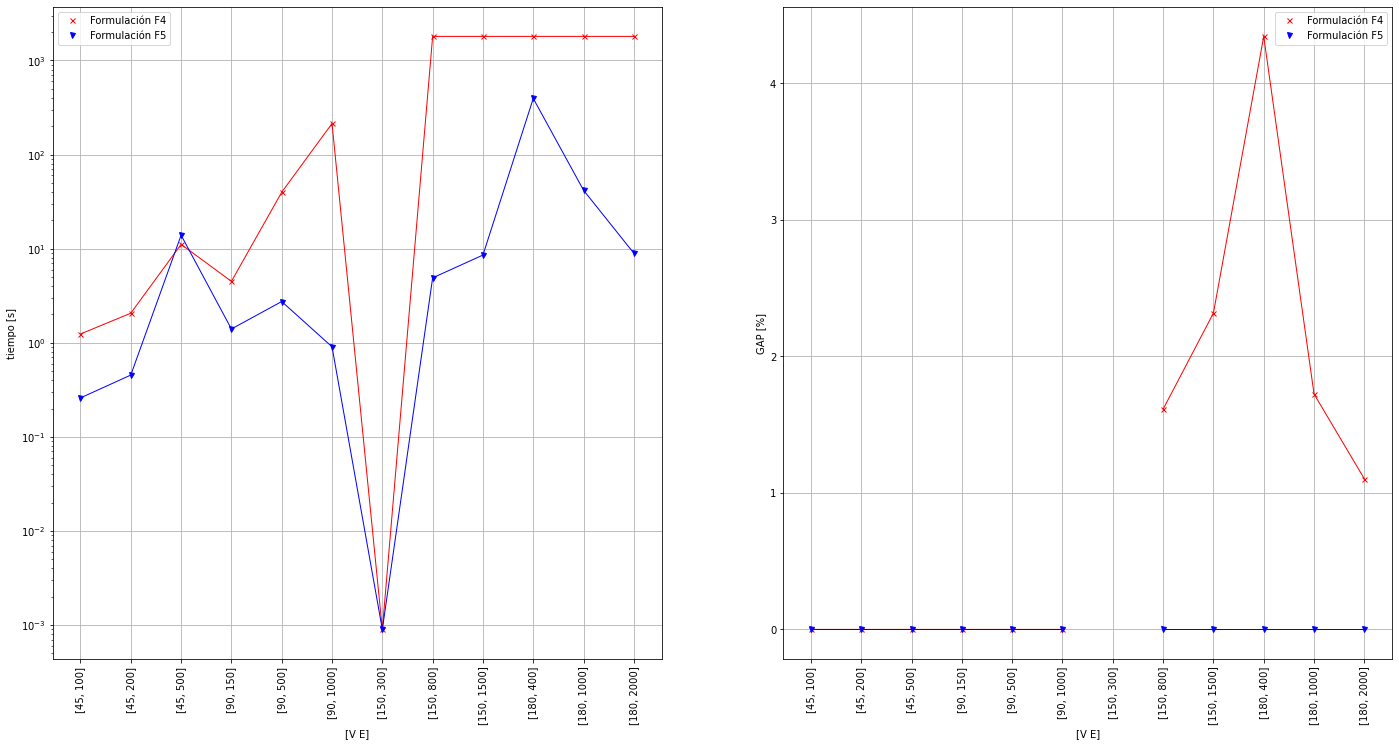

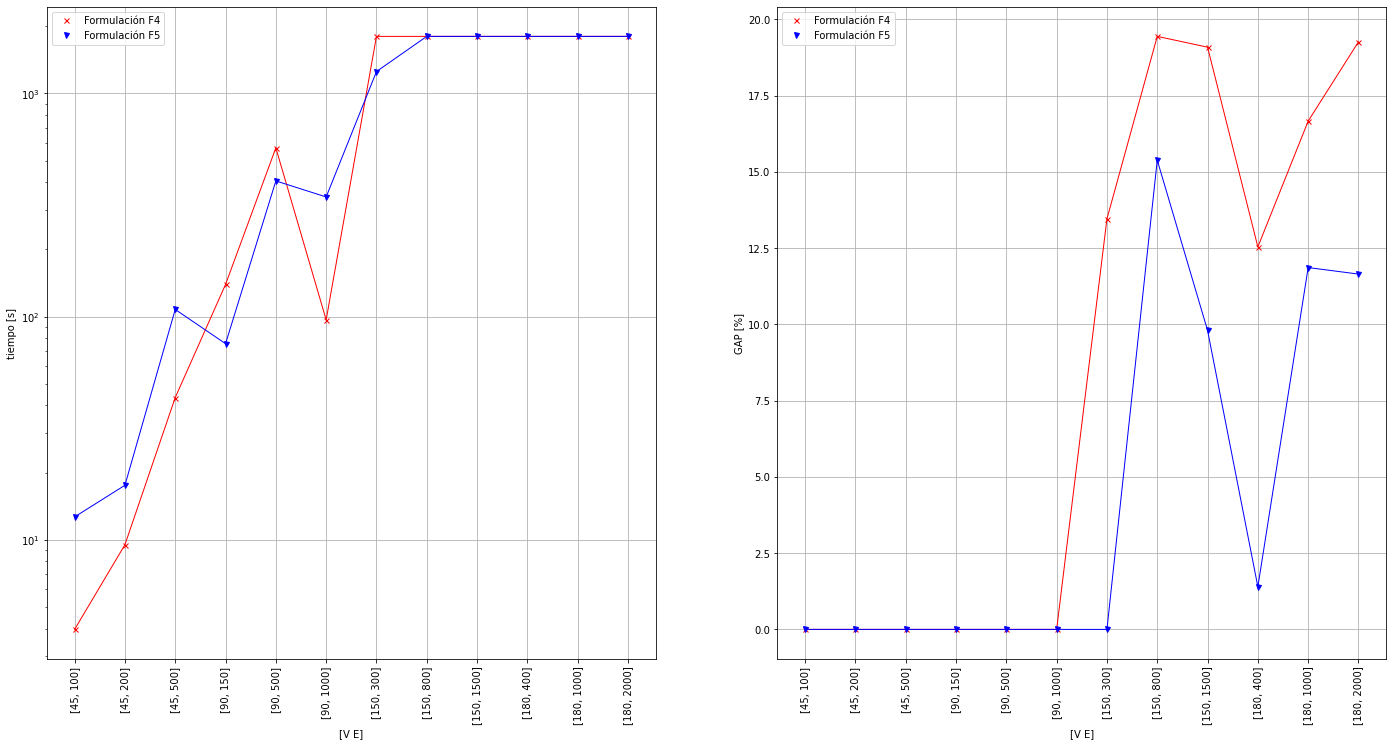

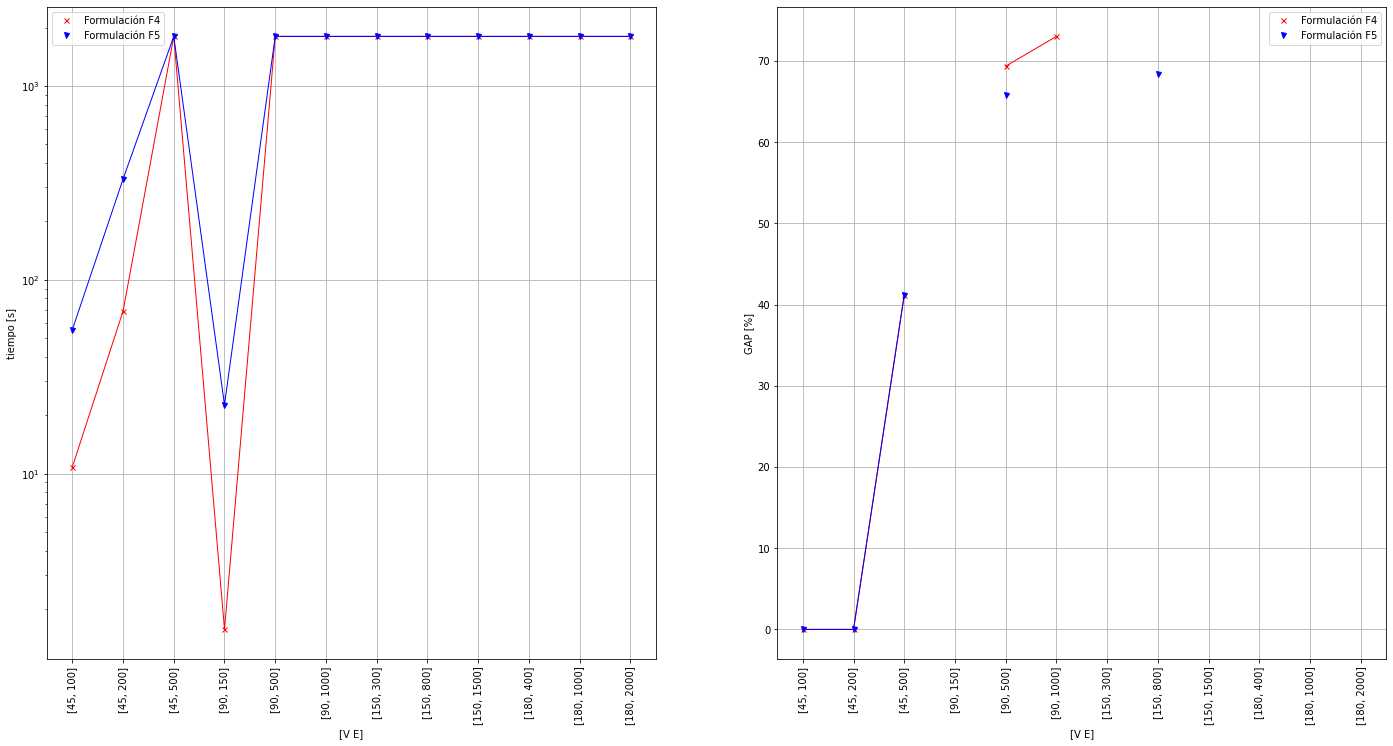

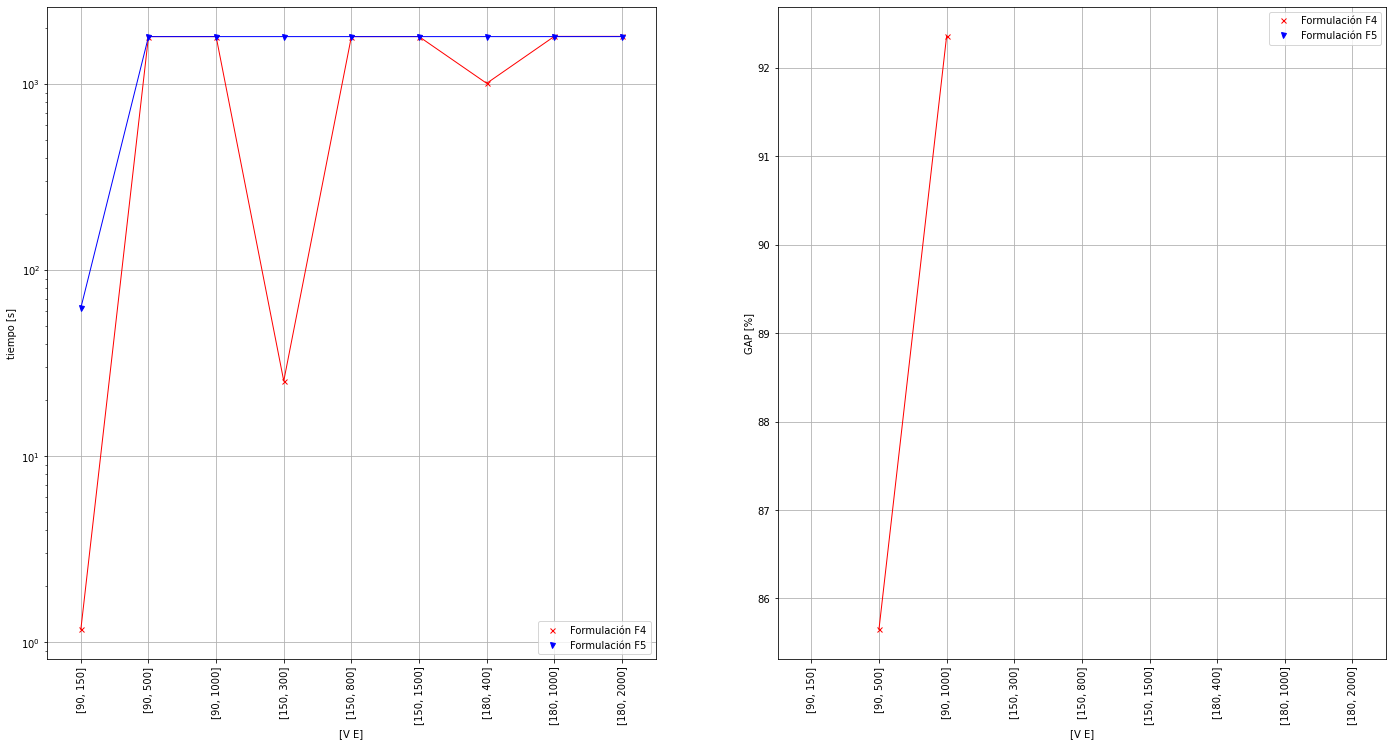

In [33]:
fig1 ,axs1 = plt.subplots(1,2,figsize=(24,12)) #tam2
fig2 ,axs2 = plt.subplots(1,2,figsize=(24,12)) #tam5
fig3 ,axs3 = plt.subplots(1,2,figsize=(24,12)) #tam10
fig4 ,axs4 = plt.subplots(1,2,figsize=(24,12)) #tam20
x_offset=0.5
import matplotlib.lines as mlines

line_parm = {
            0:{'color':'red', 'marker':'x', 'linestyle':'-', 'linewidth':1,'markersize':5, 'label':'Formulación F4'},
            1:{'color':'blue', 'marker':'v', 'linestyle':'-', 'linewidth':1,'markersize':5, 'label':'Formulación F5'}
}
mod = [
    mlines.Line2D([], [], color='red', marker='x', linestyle='None',
                        markersize=5, label='Formulación F4'),
     mlines.Line2D([], [], color='blue', marker='v', linestyle='None',
                        markersize=5, label='Formulación F5')]

#TAM2
axs1[0].set_xticklabels(com2,rotation=90)
axs1[0].set_xlabel('[V E]')
axs1[0].set_yscale('log')
axs1[0].set_ylabel('tiempo [s]')
axs1[0].plot(com2,[x[0] for x in T_tam2],**line_parm[0])
axs1[0].plot(com2,[x[1] for x in T_tam2],**line_parm[1])
axs1[0].legend(handles=mod)
axs1[0].grid(True)
axs1[1].set_xticklabels(com2,rotation=90)
axs1[1].set_xlabel('[V E]')
axs1[1].set_ylabel('GAP [%]')
axs1[1].plot(com2,[x[0] for x in G_tam2],**line_parm[0])
axs1[1].plot(com2,[x[1] for x in G_tam2],**line_parm[1])
axs1[1].legend(handles=mod)
axs1[1].grid(True)
#fig1.suptitle('$|e_{max}|=2$',fontsize=36)
fig1.savefig('F4y5_tam2.jpg',bbox_inches='tight',dpi=300)

#TAM5
axs2[0].set_xticklabels(com5,rotation=90)
axs2[0].set_xlabel('[V E]')
axs2[0].set_yscale('log')
axs2[0].set_ylabel('tiempo [s]')
axs2[0].plot(com5,[x[0] for x in T_tam5],**line_parm[0])
axs2[0].plot(com5,[x[1] for x in T_tam5],**line_parm[1])
axs2[0].legend(handles=mod)
axs2[0].grid(True)
axs2[1].set_xticklabels(com5,rotation=90)
axs2[1].set_xlabel('[V E]')
axs2[1].set_ylabel('GAP [%]')
axs2[1].plot(com5,[x[0] for x in G_tam5],**line_parm[0])
axs2[1].plot(com5,[x[1] for x in G_tam5],**line_parm[1])
axs2[1].legend(handles=mod)
axs2[1].grid(True)
#fig2.suptitle('$|e_{max}|=5$',fontsize=36)
fig2.savefig('F4y5_tam5.jpg',bbox_inches='tight',dpi=300)

#TAM10
axs3[0].set_xticklabels(com10,rotation=90)
axs3[0].set_xlabel('[V E]')
axs3[0].set_yscale('log')
axs3[0].set_ylabel('tiempo [s]')
axs3[0].plot(com10,[x[0] for x in T_tam10],**line_parm[0])
axs3[0].plot(com10,[x[1] for x in T_tam10],**line_parm[1])
axs3[0].legend(handles=mod)
axs3[0].set_xlim(-x_offset,len(com10)-1+x_offset)
axs3[0].grid(True)
axs3[1].set_xticklabels(com10,rotation=90)
axs3[1].set_xlabel('[V E]')
axs3[1].set_ylabel('GAP [%]')
axs3[1].plot(com10,[x[0] for x in G_tam10],**line_parm[0])
axs3[1].plot(com10,[x[1] for x in G_tam10],**line_parm[1])
axs3[1].legend(handles=mod)
axs3[1].set_xlim(-x_offset,len(com10)-1+x_offset)
axs3[1].grid(True)
#fig3.suptitle('$|e_{max}|=10$',fontsize=36)
fig3.savefig('F4y5_tam10.jpg',bbox_inches='tight',dpi=300)

#TAM20
axs4[0].set_xticklabels(com20,rotation=90)
axs4[0].set_xlabel('[V E]')
axs4[0].set_yscale('log')
axs4[0].set_ylabel('tiempo [s]')
axs4[0].plot(com20,[x[0] for x in T_tam20],**line_parm[0])
axs4[0].plot(com20,[x[1] for x in T_tam20],**line_parm[1])
axs4[0].legend(handles=mod)
axs4[0].set_xlim(-x_offset,len(com20)-1+x_offset)
axs4[0].grid(True)
axs4[1].set_xticklabels(com20,rotation=90)
axs4[1].set_xlabel('[V E]')
axs4[1].set_ylabel('GAP [%]')
axs4[1].plot(com20,[x[0] for x in G_tam20],**line_parm[0])
axs4[1].plot(com20,[x[1] for x in G_tam20],**line_parm[1])
axs4[1].legend(handles=mod)
axs4[1].set_xlim(-x_offset,len(com20)-1+x_offset)
axs4[1].grid(True)
#fig4.suptitle('$|e_{max}|=20$',fontsize=36)
fig4.savefig('F4y5_tam20.jpg',bbox_inches='tight',dpi=300)
plt.show()